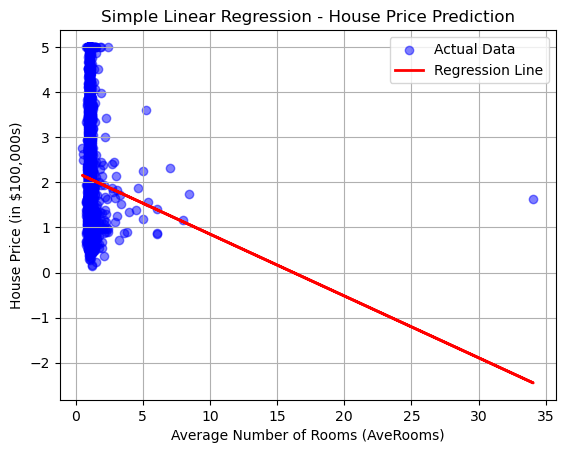

In [1]:
# Part-I: Linear Regression 

#Task 1: Simple Linear Regression 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X = housing.data[:, [3]] 
y = housing.target        

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='blue', label='Actual Data', alpha=0.5)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Average Number of Rooms (AveRooms)')
plt.ylabel('House Price (in $100,000s)')
plt.title('Simple Linear Regression - House Price Prediction')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
# Task 2: Multiple Linear Regression 

import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R-squared:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
for feature, coef in zip(feature_names, model.coef_):
    print(f"{feature}: {coef:.4f}")


R-squared: 0.5757877060324521
Mean Squared Error (MSE): 0.5558915986952425
Root Mean Squared Error (RMSE): 0.7455813830127751
MedInc: 0.4487
HouseAge: 0.0097
AveRooms: -0.1233
AveBedrms: 0.7831
Population: -0.0000
AveOccup: -0.0035
Latitude: -0.4198
Longitude: -0.4337


In [9]:
# Task 3: Feature Scaling and Normalization 

from sklearn.preprocessing import StandardScaler

r2_no = r2_score(y_test, y_pred_no_scaling)
mse_no = mean_squared_error(y_test, y_pred_no_scaling)
rmse_no = np.sqrt(mse_no)

#  Apply Standard Scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model WITH Scaling
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)

r2_scaled = r2_score(y_test, y_pred_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)

# Comparing Results 
print("Model Performance WITHOUT Scaling")
print(f"R²:   {r2_no:.4f}")
print(f"MSE:  {mse_no:.4f}")
print(f"RMSE: {rmse_no:.4f}\n")

print("Model Performance WITH Standard Scaling")
print(f"R²:   {r2_scaled:.4f}")
print(f"MSE:  {mse_scaled:.4f}")
print(f"RMSE: {rmse_scaled:.4f}")


Model Performance WITHOUT Scaling
R²:   0.5758
MSE:  0.5559
RMSE: 0.7456

Model Performance WITH Standard Scaling
R²:   0.5758
MSE:  0.5559
RMSE: 0.7456


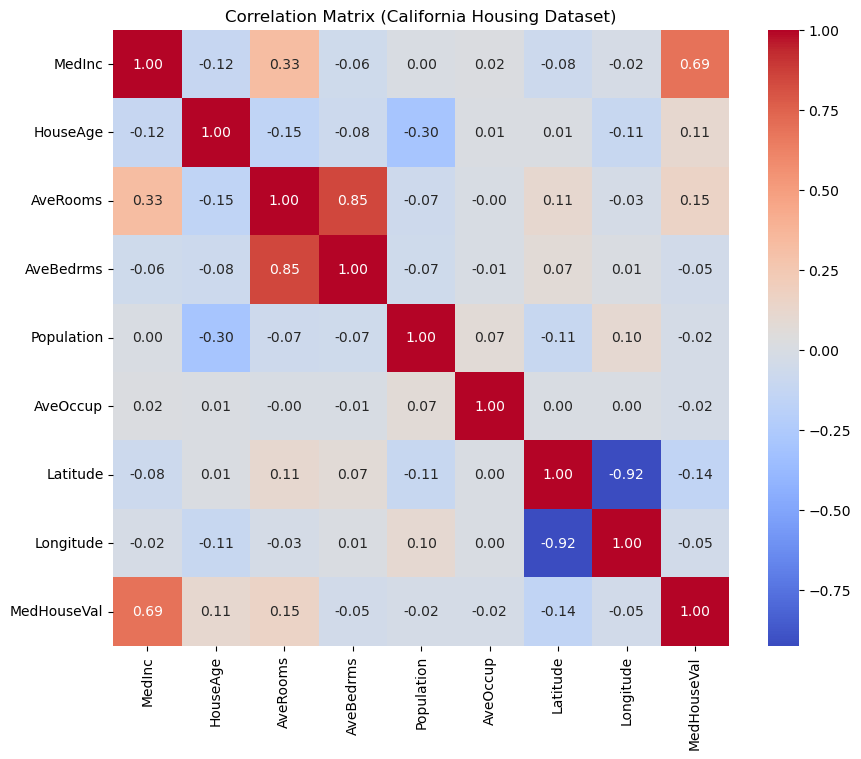


Features Most Correlated with Target (MedHouseVal)
MedInc        0.688075
AveRooms      0.151948
Latitude      0.144160
HouseAge      0.105623
AveBedrms     0.046701
Longitude     0.045967
Population    0.024650
AveOccup      0.023737
Name: MedHouseVal, dtype: float64


In [14]:
# Task 4: Model Interpretation 

import seaborn as sns

housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target
X['MedHouseVal'] = y

corr_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix (California Housing Dataset)")
plt.show()

correlation_with_target = corr_matrix["MedHouseVal"].drop("MedHouseVal")
strongest_features = correlation_with_target.abs().sort_values(ascending=False)

print("\nFeatures Most Correlated with Target (MedHouseVal)")
print(strongest_features)
